# Project 5.1

In [1]:
# Ito integral path sampling on [0,1] with dt=0.001
# (a) ∫_0^t 4 B_s^3 dB_s
# (b) ∫_0^t cos(B_s) dB_s
# (c) 1 - ∫_0^t e^{s/2} sin(B_s) dB_s
# Left-point (Itô) discretization: I_{t_j} = I_{t_{j-1}} + X_{t_{j-1}} * (B_{t_j} - B_{t_{j-1}})

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Core simulation primitives
# ----------------------------
def simulate_brownian_paths(T=1.0, dt=0.001, n_paths=10, seed=42):
    """
    Return time grid t (N+1,), Brownian paths B (n_paths, N+1),
    and increments dB (n_paths, N) with dB ~ N(0, dt) i.i.d.
    """
    rng = np.random.default_rng(seed)
    N = int(round(T / dt))
    t = np.linspace(0.0, T, N + 1)
    dB = rng.normal(loc=0.0, scale=np.sqrt(dt), size=(n_paths, N))
    B = np.zeros((n_paths, N + 1))
    B[:, 1:] = np.cumsum(dB, axis=1)
    return t, B, dB

def ito_integral_paths(integrand, T=1.0, dt=0.001, n_paths=10, seed=42):
    """
    Compute I_t = ∫_0^t X_s dB_s with left-point rule:
    I_{j} = I_{j-1} + X(t_{j-1}, B_{j-1}) * dB_j
    integrand(t, B) must accept arrays shaped like:
      t: (1, N), B: (n_paths, N), and return (n_paths, N)
    """
    t, B, dB = simulate_brownian_paths(T=T, dt=dt, n_paths=n_paths, seed=seed)
    X_left = integrand(t[:-1][None, :], B[:, :-1])  # evaluate at left endpoints
    I = np.zeros_like(B)
    I[:, 1:] = np.cumsum(X_left * dB, axis=1)
    return t, B, I

# ----------------------------
# Problem-specific integrands
# ----------------------------
def integrand_a(t, B):
    # X_t = 4 * B_t^3
    return 4.0 * (B ** 3)

def integrand_b(t, B):
    # X_t = cos(B_t)
    return np.cos(B)

def integrand_c(t, B):
    # X_t = e^{t/2} * sin(B_t)
    return np.exp(t / 2.0) * np.sin(B)

# ----------------------------
# Convenience plotting helpers
# ----------------------------
def plot_paths(t, paths, title, ylabel="Integral value"):
    plt.figure(figsize=(8, 4))
    for k in range(paths.shape[0]):
        plt.plot(t, paths[k], linewidth=1.2)
    plt.xlabel("t")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()

In [2]:
# Parameters
T = 1.0
dt = 0.001
n_paths = 10
seed = 42

## (a) 

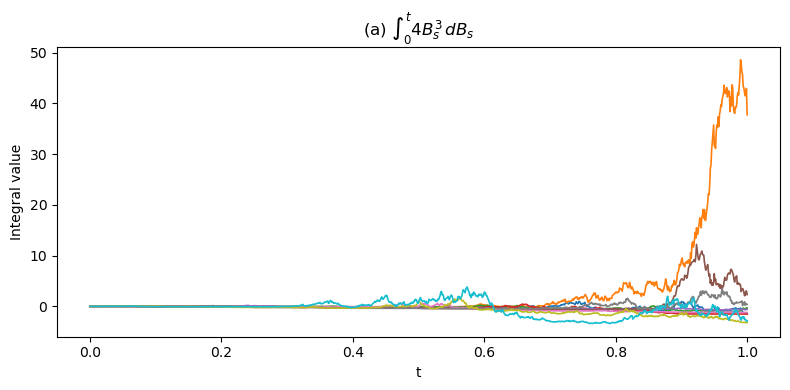

In [3]:
# (a) ∫ 4 B^3 dB
t, B, I_a = ito_integral_paths(integrand_a, T=T, dt=dt, n_paths=n_paths, seed=seed)
plot_paths(t, I_a, r"(a) $\int_0^t 4B_s^3\, dB_s$")

## (b)

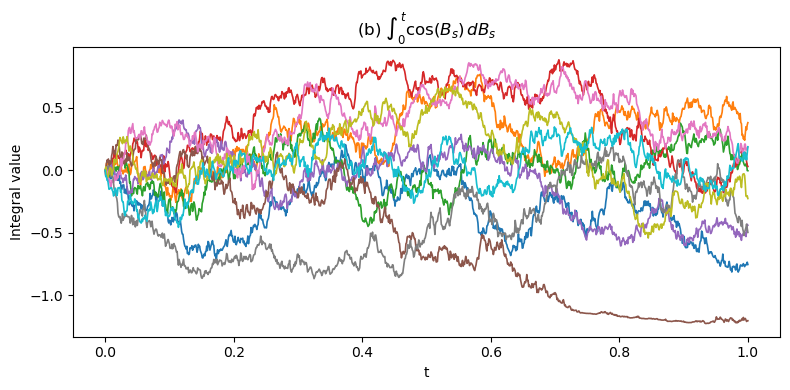

In [4]:
# (b) ∫ cos(B) dB
t, B, I_b = ito_integral_paths(integrand_b, T=T, dt=dt, n_paths=n_paths, seed=seed+1)
plot_paths(t, I_b, r"(b) $\int_0^t \cos(B_s)\, dB_s$")

## (c)

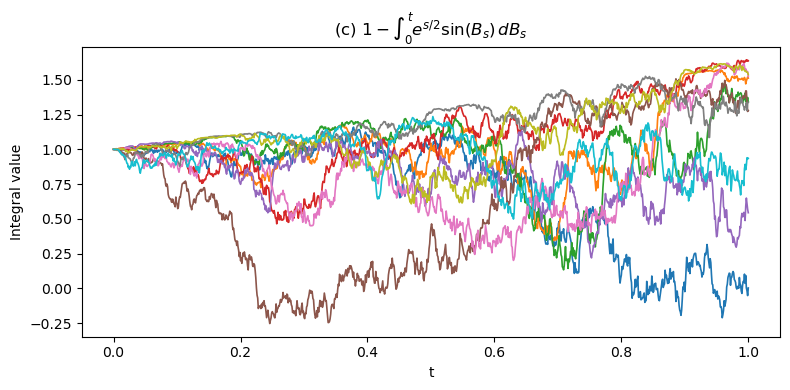

In [5]:
# (c) 1 - ∫ e^{s/2} sin(B) dB
t, B, I_c_raw = ito_integral_paths(integrand_c, T=T, dt=dt, n_paths=n_paths, seed=seed+2)
I_c = 1.0 - I_c_raw  # full process requested in the question
plot_paths(t, I_c, r"(c) $1 - \int_0^t e^{s/2}\sin(B_s)\, dB_s$")

**Question 5.7**

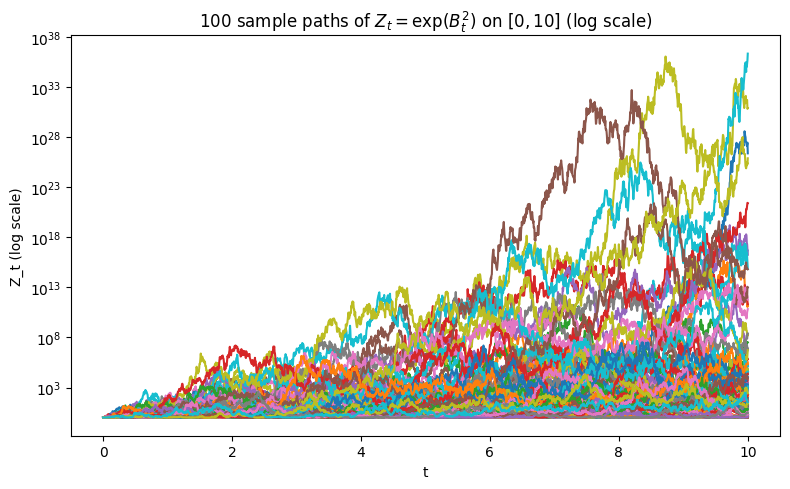

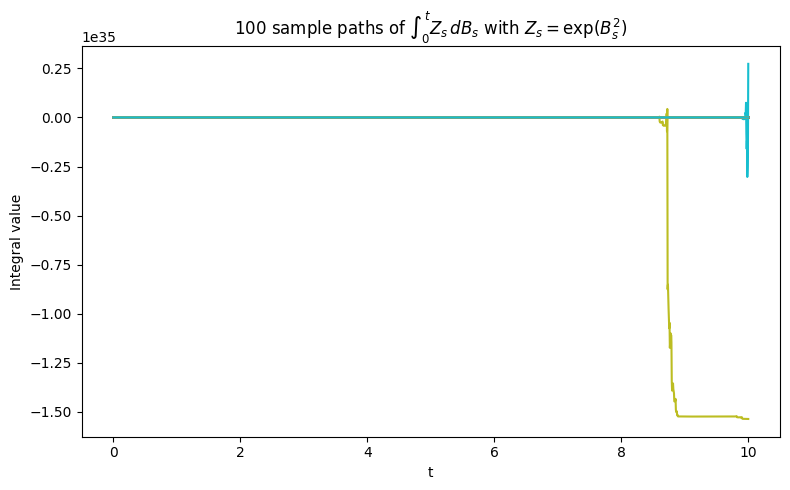

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random number generator
rng = np.random.default_rng(42)

# Simulation settings
T = 10.0
N = 2000                  # time steps
dt = T / N
sqrt_dt = np.sqrt(dt)
n_paths = 100

# Brownian motion paths
dB = sqrt_dt * rng.normal(size=(n_paths, N))
B = np.cumsum(dB, axis=1)
B = np.hstack([np.zeros((n_paths, 1)), B])  # include t=0
t = np.linspace(0.0, T, N + 1)

# Z_t = exp(B_t^2); cap exponent to avoid floating overflow while still showing blow-ups
Z = np.exp(np.minimum(B**2, 700.0))

# Plot 100 paths of Z_t (use log-scale because values grow extremely fast)
plt.figure(figsize=(8, 5))
for i in range(n_paths):
    plt.semilogy(t, Z[i])
plt.title(r"100 sample paths of $Z_t = \exp(B_t^2)$ on $[0,10]$ (log scale)")
plt.xlabel("t")
plt.ylabel("Z_t (log scale)")
plt.tight_layout()
plt.show()

# Ito integral I_t ≈ sum_{k} Z_{t_k} ΔB_k (left-point Riemann sums)
I = np.zeros_like(B)
for k in range(N):
    I[:, k+1] = I[:, k] + Z[:, k] * dB[:, k]

# Plot 100 paths of the Ito integral
plt.figure(figsize=(8, 5))
for i in range(n_paths):
    plt.plot(t, I[i])
plt.title(r"100 sample paths of $\int_0^t Z_s \, dB_s$ with $Z_s=\exp(B_s^2)$")
plt.xlabel("t")
plt.ylabel("Integral value")
plt.tight_layout()
plt.show()